#### 

# Picking the Best Predictive Model: A Case Study in Analytics Operationalization 

## Part 1. Introduction and Exploratory Data Analysis

### Author: Craig Adams
#### Contact: craig.adams@elementaryinsights.com
#### Date: July 5, 2022
_________

### Table of Contents

[Introduction](#Introduction) <br>
[Case Study](#Case-Study)<br>
[Methodology](#Methodology) <br>
[Results and Discussion](#Results-and-Discussion) <br>
[Summary](#Summary) <br>

###  Introduction

>"*All models are wrong, some are useful, and some are more cost effective than others - Unknown*"
                
Machine Learning (ML) is a powerful approach for converting data into insights and actionable information for faster, better data-driven decisions within an organization.  There are a variety of techniques and applications, ranging from Neural Networks for image processing, to Natural Language Processing (NLP) algorithms for text-based data analysis, to Regression and Classification methods for predictive modeling of numeric data. According to [Fortune Business Insights](https://www.fortunebusinessinsights.com/machine-learning-market-102226), the global market for ML was 15 billion USD in 2021 with a forecasted 20-fold growth rate to 290 billion within 10 years as organization seek to leverage ML to improve business performance and gain competitive advantage.  

However, ML techniques are not necessarily the best choice for each business situation. For example, a certain amount of expertise is required to design and develop predictive ML models in order to generate the desired analytical insights and these skills can be expensive to acquire and retain. Expertise is also required to "operationalize" the insights by converting them into an effective and sustainable digital product that can be used by the decision makers on demand.  Both of these steps can require extensive investments in Information Technology (IT) and Operational Technology (OT) infrastructure, ranging from sensors and data collection systems in the field, to real-time data capture and data storage systems, to third-party cloud services to host the data, run the ML model and publish the actionable information to a web-based digital interface.

There are situations where simpler, perhaps more traditional data analysis techniques would suffice, both in terms of ease of development (for example, an Excel spreadsheet on a desktop computer), and deployment (for example, a "business rule" that everyone is trained to follow in order to make the right decision when a known problem arises). 

The goal of this study is to explore this space, more specifically the development of different analytical solutions for a particular business problem, ranging from the simplest techniques to more complex ML models.  Through the exploration, the aim is to: 
1. Evaluate model performances from a technical perspective such as goodness of fit and prediction accuracy
2. Evaluate model performances from a business perspective in terms of:
    - impact on business KPIs 
    - relative cost of development 
    - relative cost of operationalization 
    
           
### Case Study

[go to top](#Table-of-Contents) <br>

The case study that will be used for the exploration is from a field where ML is often used to build predictive models: Equipment Reliability. A major challenge in industry is managing the lifecycle of a piece of equipment as the components wear down and performance degrades (Figure 1).  At some point during the lifecycle, there is a failure event where the equipment is no longer operable. In most cases, it is ideal to run the equipment or component to the end of its useful life prior to replacing it BUT, also in most cases, it is ideal to replace it just before the failure. 

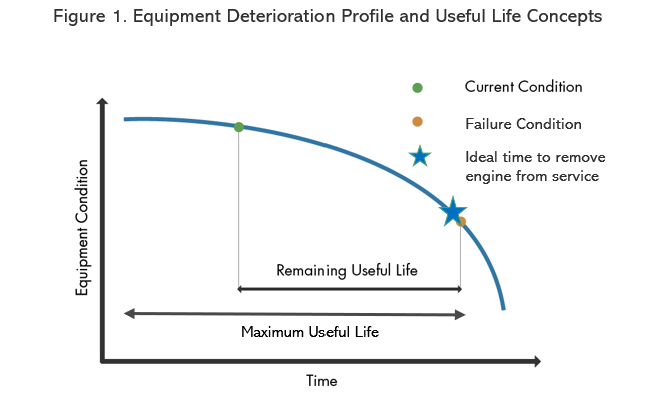

The business value of finding this 'sweet spot' is:
            
1. Maximizing asset value and minimizing the amount spent on the equipment per unit of operating time

2. Avoiding the (typically) significant increase in costs for unplanned failures
    - maintenance costs are usually higher, similar to having to tow your car if it fails on the highway 
    - other quantitative and qualitative costs associated with the increase in business risk, e.g. unsafe conditions for workers or others exposed to the failed equipment.

The case study will use the NASA Turbofan Jet Engine Data Set, a popular data set that describes the degradation in performance of a fleet of turbofan jet engines. The typical objective for those using the dataset is to find the most accurate predictive model for the Remaining Useful Life, or RUL for short, of the jet engines anywhere within their lifecycle and for different operating environments.  For example, this [paper](https://www.nature.com/articles/s41598-022-10191-2) on a Deep Learning approach to predicting RUL was just published this year in the high profile journal, Nature.  It goes without saying why NASA and other organizations that operate jet aircraft would be interested in highly accurate RUL predictions. 

The intent of the case study, however, is to take the opposite approach and analyse the data in a different way: start simple and see if there are opportunities to apply other non-ML modeling methods first before considering any ML techniques, especially advanced ones like Deep Learning.  In addition, the focus is not just on predictions of RUL throughout the engine lifecycle but instead how to build and use the models to maximize the operating lifecycle of the engines for a business, yet manage that to an acceptable risk of failure and an acceptable cost for model development and deployment. 

To help further establish this context, and to help mollify anyone concerned about the concept of allowing jet engines to run to failure during operation, the following semi-fictious business scenario has been created:

> Jetsonair is a (fictious) company that has invented a jet-powered drone that can expediently deliver packages to remote locations.  They have had a fleet of drones in operation for two years.  Each drone has the ability to deliver a small 5 kg package to an airstrip or road within a 500 km radius of the home port.  Each drone has two engines. Each engine has sensors on board to monitor engine health.  The sensor data has been collected at regular intervals but not used.  Instead, the engines have been allowed to run to failure, causing the drone to perform an emergency landing.  There have been a few crashes in remote locations with complete loss of the drone and the goods on board but no other consequences or loss of life.

>Under pressure from customers, the owner George J. wants to prevent any further unplanned engine failures. He's heard about AI and Machine Learning and wants to hire a full-time data scientist to solve the problem.  The CEO Bob Loblaw is skeptical and instead has hired Elementary Insights to take a look at the data and come up with different options for his team to consider implementing to a) prevent unplanned engine failures and crashes while b) maximizing the life of the engines and minimizing the operating costs.

Let's begin.

### Methodology 

[go to top](#Table-of-Contents) <br>

#### The Source Data

The Case Study data set became available from [NASA's open data portal](https://data.nasa.gov/Aerospace/Turbofan-engine-degradation-simulation-data-set/vrks-gjie) in 2008.  It is now very popular and can be found on [Kaggle](https://www.kaggle.com/datasets/behrad3d/nasa-cmaps).

The .zip-file download consists of four data sets with multiple multivariate time series from simulations of engine degradation that NASA created using a modeling tool called C-MAPSS. The four sets relate to the combinations of the number of engine failure modes (1 or 2) and the number of operating environments (1 or 6).

For this project, the first dataset called FD001 will be used.  There is a train_FD001 set of records for 100 engines with 1 failure mode, 1 operating environment (Sea Level), and 1 failure event each.  The details of the data are listed in the Data Dictionary below.  

A test set is also available but it does not contain any engines that have run to failure, which is a requirement for the case study and the modeling approaches being explored here.  Any test sets that need to be created for modeling purposes such as in Machine Learning will need to be split out from the main train_FD001 data set in due course.

#### The Data Dictionary

The data are provided as a text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle. Each column corresponds to one of three types of data:

*Unit details* - the unit number of the engine and its time series of cycles ordered sequentially
- `unit number`
- `cycle_time`

*Operational settings* - the three settings that describe the operating state of the engine during a cycle

- `operational setting 1`
- `operational setting 2`
- `operational setting 3`

*Sensors* - time series measurement values for 21 onboard sensors as recorded for each cycle

- `sensor 1`
- `sensor 2`
...
- `sensor 21`

Note that a few other things are assumed about the engines and the data:
 - All engines experience the same general operating environment
 - All engines can only run to failure and do so through the single failure mode (engine component wear) 
 - There are no interventions with other maintenance strategies (e.g. component replacement or repair) 
 - Each cycle represents the same time step in hours of operation.
 

#### The Test Plan

The project is broken into four Parts in four Jupyter notebooks:

**Part 1. Introduction and Exploratory Data Analysis**  Explores the data to understand how it relates to the case study at hand

**Part 2. Statistical Analysis and Modeling** and **Part 3. Machine Learning Modeling of Remaining Useful Life**  explore options to predict the failures before the end of life using Statistical methods and Machine Learning algorithms respectively

**Part 4. Assessment of Predictive Model Performance** Compares and summarized the performances of the successful models from both technical and business perspectives as well as summarizes learnings from the modeling exercises.  

A separate Python script is provided for the interactive portion of Part 4. A README file is also provided to provide guidance on the flow between the notebooks and any additional packages that need to be installed. 

### Results and Discussion

[go to top](#Table-of-Contents) <br>

#### Training Set Data Inspection and EDA

As per normal Data Science practice, the first step is to read the train_FD001 text file into a pandas dataframe and inspect its structure and contents.

In [1]:
### Python Configuration

# Import relevant packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats # For Pearson correlation

# Set environment variables

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
# Import the data from the project directory
load_file = './data/train_FD001.txt'
failure_df_raw = pd.read_csv(load_file, sep='\s+', header = None)

display(failure_df_raw.head())

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


As noted in the Introduction, the raw data does not have column names. These can be created using the data dictionary and then appended to the dataframe.

In [3]:
### Add column names based on the data dictionary

# Build the unit detail, operational setting and sensor names
unit_details = ['unit_number','cycle_time']
operational_settings = ['op_setting_'+str(number) for number in np.arange(1,4)]
sensor_names = ['sensor_'+str(number) for number in np.arange(1,22)]    

# Compile the column names and write to the dataframe
failure_df_raw.columns = unit_details + operational_settings + sensor_names

# Find the shape and basic characteristics of the data frame
display(failure_df_raw.head(5))
print(f"The dataframe shape is {failure_df_raw.shape[0]} rows and {failure_df_raw.shape[1]} columns\n")
display(failure_df_raw.info())


,unit_number,cycle_time,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


The dataframe shape is 20631 rows and 26 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unit_number   20631 non-null  int64  
 1   cycle_time    20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631

None

The dataframe has 26 rows as expected with 20,631 records.  All of the data is in numeric format without Null values.  Note that data for `sensor_17` and `sensor_18` are integers while all other numeric values are floats.

The summary statistics for the data are shown below. 

In [4]:
# Print summary stats
display(failure_df_raw.describe().T)

# Check for nulls and duplicates
print(f"Null value count {failure_df_raw.isnull().any().sum()}")
print(f"Duplicate rows {failure_df_raw.duplicated().sum()}")
print(f"Duplicate columns {failure_df_raw.T.duplicated().sum()}")

# Calculate the mean value for records per unit => implies mean cycle time
total_units = failure_df_raw['unit_number'].max()
print(f"The implied mean cycle time is {round(failure_df_raw.shape[0]/total_units,1)}")

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle_time,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


Null value count 0
Duplicate rows 0
Duplicate columns 1
The implied mean cycle time is 206.3


Observations for the data set are as follows:

- There are 100 units for the 20631 records as expected
- The maximum `cycle_time` for all engines is 362 cycles, and the average is implied to be about 206 cycles (total records/total units) 
- The `op_setting_3` has a constant value of 100
- By inspection, the duplicated column alert is referencing the value of 100 for `op_setting_3` and `sensor_19`
- By inspection, some of the other sensors also have constant values

Sensors and settings with constant values have no information relative to the cycle times and engine degradation that are being studied here. These columns can be dropped immediately.

In [5]:
# Find the columns who's values don't change
drop_columns = [column for column in failure_df_raw.columns if failure_df_raw[column].max() == failure_df_raw[column].min()] 
print(drop_columns)

['op_setting_3', 'sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']


Six out of 21 of the sensors and the one operating setting are selected automatically. Visual inspection of the table statistics shows that one additional column can be dropped as well as: the value for `sensor_6` doesn't change significantly on a relative basis (no change between 25th quartile and the maximum value). 

In [6]:
# Update list with extra sensor
sensor_6_range = failure_df_raw['sensor_6'].max()-failure_df_raw['sensor_6'].min()
print(f"Percent change in sensor_6: {round(sensor_6_range/failure_df_raw['sensor_6'].max()*100,2)} %")
drop_columns.append('sensor_6') 


Percent change in sensor_6: 0.05 %


In total, seven of the 21 sensors and 1 operating setting can be dropped from the dataset, leaving 14 sensors and 2 settings. The updated dataframe is shown below.

In [7]:
### Start to build the cleaned dataset for training 

# Create a copy of the raw dataframe and drop columns
failure_df = failure_df_raw.copy()
failure_df = failure_df.drop(drop_columns, axis=1)

# Display revised table and check for duplicate rows and columns
display(failure_df.describe().T)
print(f"Dropped columns :{drop_columns}")
print(f"Duplicate columns {failure_df.T.duplicated().sum()}")


,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,29.227633,1.0000,26.0000,52.0000,77.0000,100.0000
cycle_time,20631.0,108.807862,68.880990,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting_1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting_2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0000,0.0003,0.0006
sensor_2,20631.0,642.680934,0.500053,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_7,20631.0,553.367711,0.885092,549.8500,552.8100,553.4400,554.0100,556.0600
sensor_8,20631.0,2388.096652,0.070985,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
sensor_9,20631.0,9065.242941,22.082880,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900


Dropped columns :['op_setting_3', 'sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19', 'sensor_6']
Duplicate columns 0


The remaining operational settings and sensors have some range between the minimum and maximum values
and therefore may contain information on the degradation of the engine and the Remaining Useful Life metric, or RUL for short. 

It is appropriate to add that value now: The last record for each engine is the end-of-life record, therefore the RUL metric can be calculated by extracting that record and counting backwards from the cycle time. 


In [23]:
### Add target variable Remaining Useful Life or RUL

# Create empty RUL column
failure_df['RUL'] = 0
# display(failure_df.head().T)

# Extract the final record for each cycle, then calculate each RUL for the engine in the loop:
for engine in np.arange(1,101,1):
    max_cycle_time = failure_df.loc[failure_df['unit_number']==engine]['cycle_time'].max()
    RUL = max_cycle_time - failure_df.loc[failure_df['unit_number']==engine]['cycle_time']
    failure_df.iloc[RUL.index,-1] = RUL
    
# Display results; Max RUL should be 1 less than Max Cycle Time, Min RUL should be zero
display(failure_df[['cycle_time','RUL']].head(10).T)
print(f"Maximum RUL: {failure_df['RUL'].max()}")
print(f"Minimum RUL: {failure_df['RUL'].min()}")

,0,1,2,3,4,5,6,7,8,9
cycle_time,1,2,3,4,5,6,7,8,9,10
RUL,191,190,189,188,187,186,185,184,183,182


Maximum RUL: 361
Minimum RUL: 0


The first 10 records for engine 1 show the correct offset in the counts.  The Maximum RUL for the dataset is 361 or 1 less than the maximum total recorded cycle time as well. 

The distributions for the sensor, settings and RUL metric can be visualized as histograms as shown in the grid below.

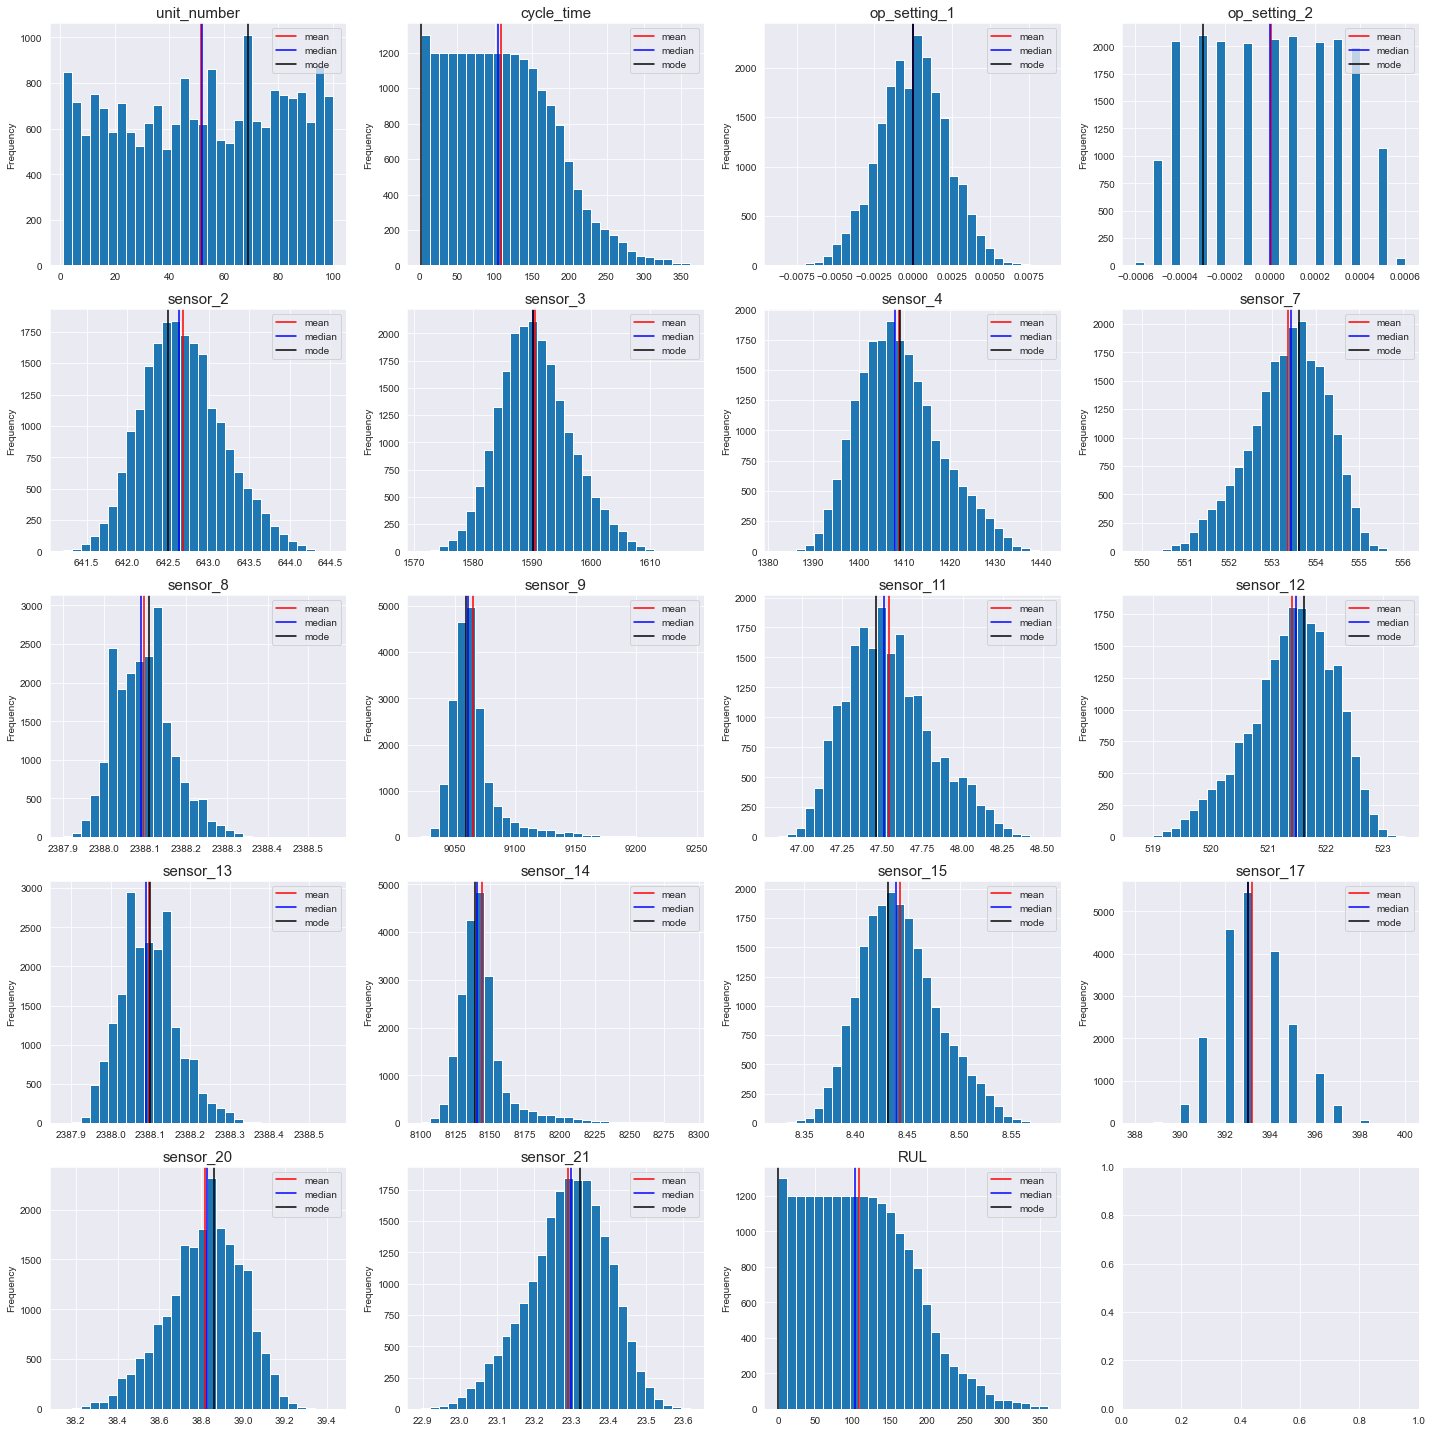

In [24]:
### Visualize the data

df = failure_df
rows = 5
cols = 4
count = 1

plt.subplots(rows, cols, figsize=(20,20))

for column in df.columns:
    plt.subplot(rows,cols, count)
    plt.hist(df[column], bins =30)
    plt.title(column, size=15)
#     plt.xlabel(col) # removed for clarity
    plt.ylabel('Frequency')
    plt.axvline(df[column].mean(), label = 'mean', color = 'red')
    plt.axvline(df[column].median(), label = 'median', color = 'blue')
    plt.axvline(df[column].mode()[0], label = 'mode', color = 'black')
    plt.legend()
    count += 1

plt.tight_layout()
plt.show()


Key observations from the plots are as follows:

- there is an uneven distribution of `unit number` records, consistent with engines failing at different times
- `cycle time` record count decays as expected as the fleet of engines experience failures, consistent with the `RUL` distribution 
- `op_setting_1` is normally distributed while `op_setting_2` is discrete and multi-modal
- the remaining sensors appear to be mostly normal distributions (mean ~ median) with minor skewedness, but there are clearly groupings within the distributions:  

Visualizing the relationships between the RUL metric and the operating settings and sensors further reveals the nature of the data (note that cycle time can be removed due to its obvious correlation to RUL).

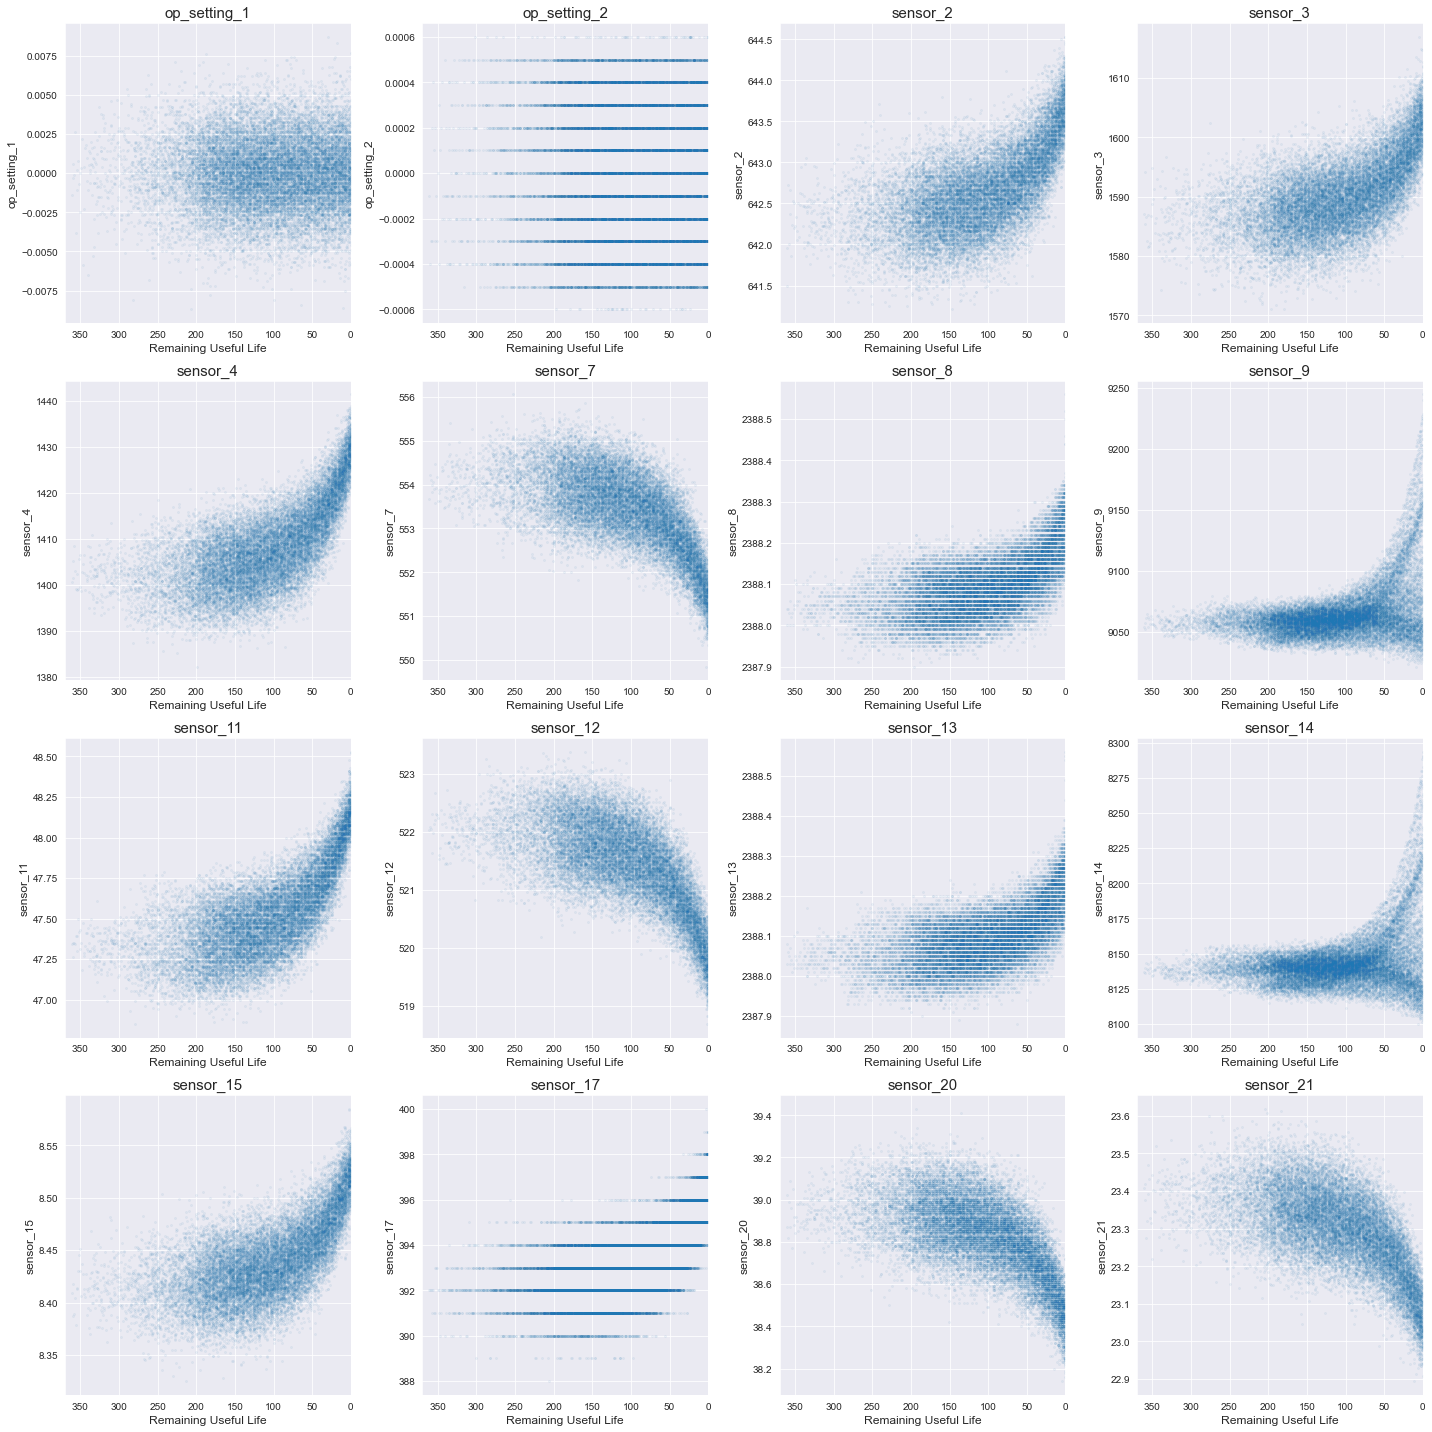

In [25]:
# Loop over the columns and plot the relationship between each column and the target, excluding the unit details columns
feature_df = failure_df.drop(unit_details, axis=1).drop(['RUL'],axis=1)
target = failure_df['RUL']

rows = 4
cols = 4
count = 1

plt.subplots(rows,cols, figsize=(20,20))


for column in feature_df.columns:
    plt.subplot(rows, cols, count)
    plt.scatter(target,feature_df[column], alpha = 0.05, s=4)
    plt.title(column, size=15)
    plt.xlabel('Remaining Useful Life', size=12)
    plt.ylabel(column, size=12)
    plt.xlim(370,0)
    count += 1
    
plt.tight_layout()
plt.show()

Note that by convention, the RUL x-axis is inverted, with zero on the right rather than left, to stay consistent with the conceptual diagrams of running to failure in Figure 1 from the Introduction.   

There are lots of interesting patterns between the operating settings, sensors and RUL:

- There are indeed three basic shapes for the sensors, grouped by how they respond as RUL approaches zero (left to right on x-axis)

    - Group 1: 'rising teardrop' curve => sensors 2,3,4,8, 11, 13, 15 and 17
    - Group 2: 'dropping teardrop' curve => 7, 12, 20 and 21
    - Group 3: 'shark-tooth' expanding distribution => sensors 9 and 14

- the two operational settings at the top also get broader as RUL approaches zero, and as such are not likely to contain useful information regarding RUL predictions

- In contrast, `sensor_11` visually appears to have the strongest relative response curve to RUL, with the widest relative scale and narrowest approach to zero and not as much overlap between values at RUL=0 and values closer to the mean of RUL=205.
    
- `sensor_4` also shows a similar strong converging pattern, whereas `sensor_8` and `sensor_13` have broader distributions as RUL approaches zero

The data can be organized and plotted again for a small subset of engines to get a better understanding of the time-based traces of the sensor values versus RUL.


In [26]:
# Select the active sensors via set analysis, use the list to iteratively sort the next plots into pairs where possible
active_sensors = set(operational_settings + sensor_names).difference(drop_columns)
print(active_sensors)

{'sensor_17', 'sensor_7', 'sensor_13', 'sensor_14', 'sensor_8', 'sensor_21', 'sensor_4', 'op_setting_2', 'sensor_9', 'sensor_2', 'sensor_20', 'sensor_3', 'sensor_12', 'sensor_11', 'op_setting_1', 'sensor_15'}


In [27]:
# Reorganize the sensors into Groups
active_sensors_sorted = ['sensor_9','sensor_14','op_setting_1','op_setting_2','sensor_7','sensor_12','sensor_20','sensor_21','sensor_8','sensor_13',
                         'sensor_3', 'sensor_4','sensor_11','sensor_15','sensor_2','sensor_17']

len(active_sensors_sorted) == len(active_sensors)

True

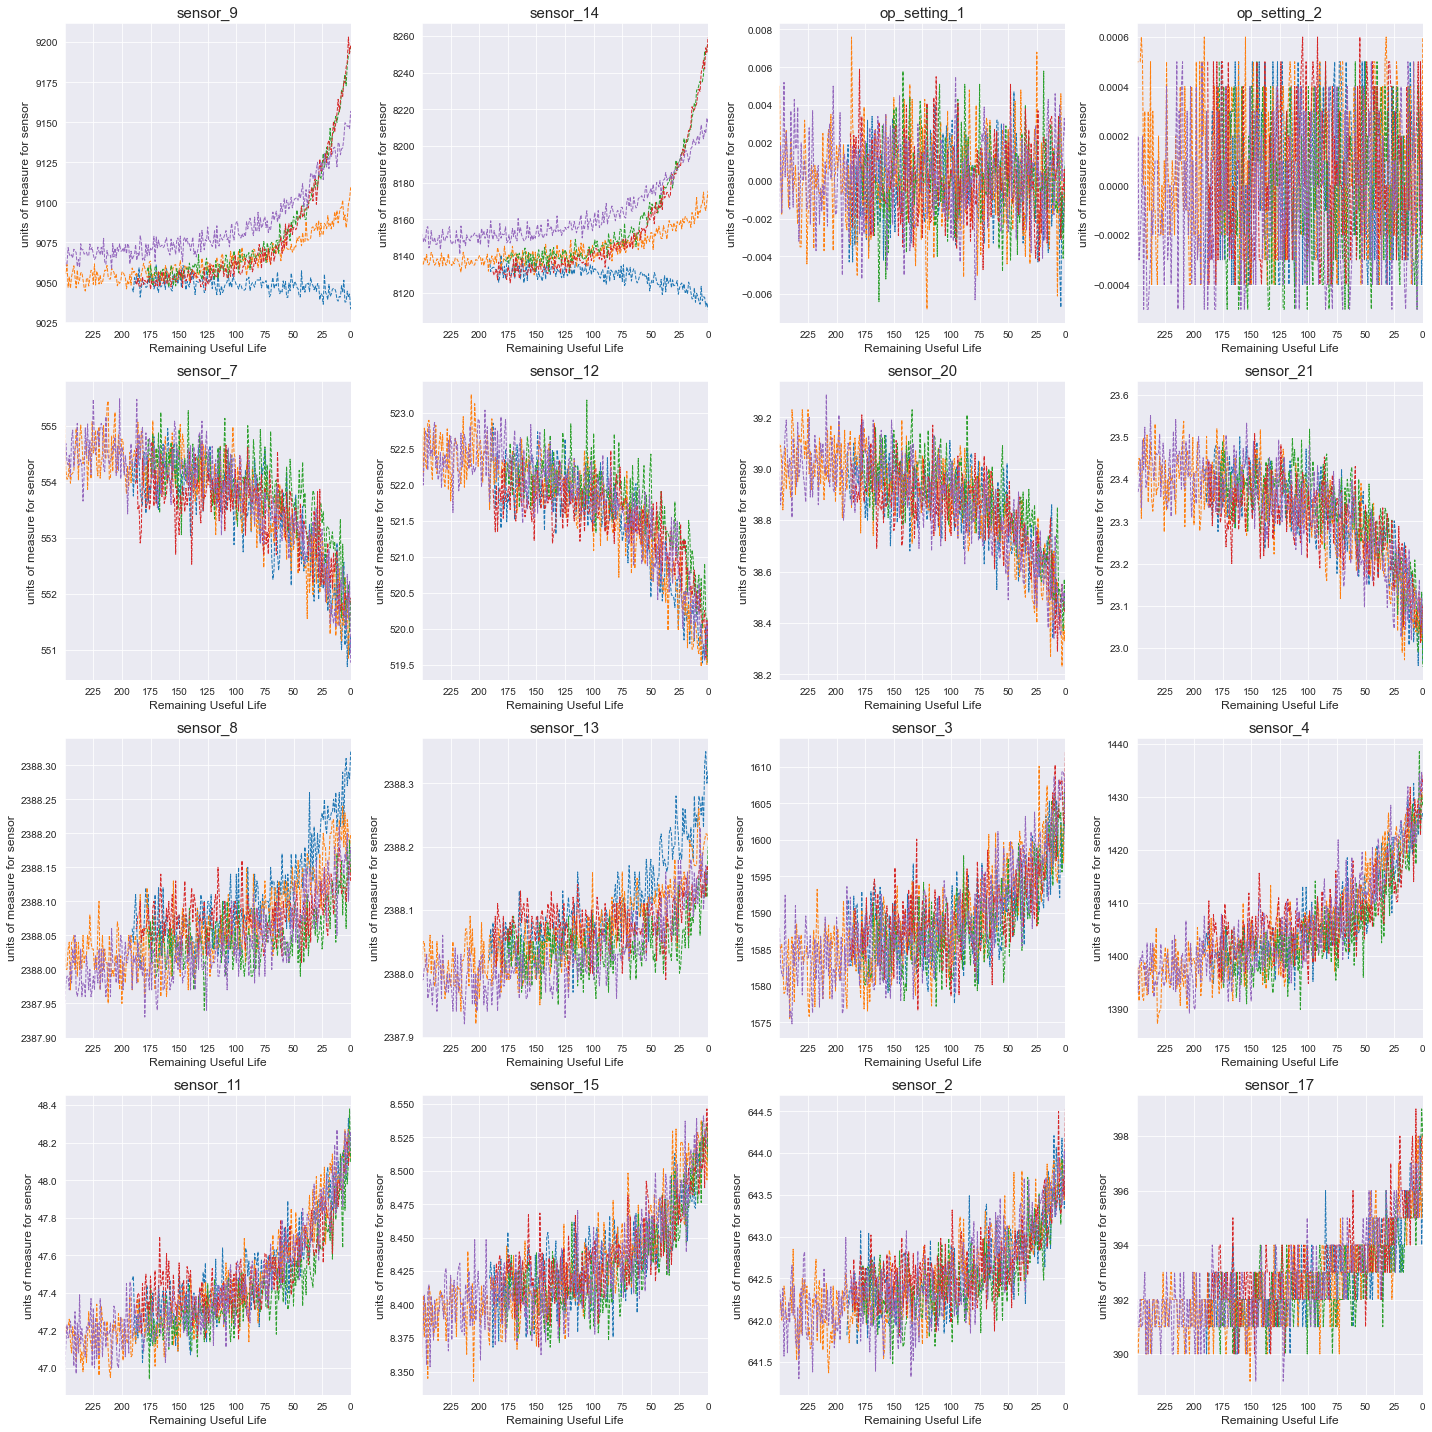

In [28]:
# Pick a number of of engines to display
engine_limit = 5

# Plot only that set of trajectories 
rows = 4
cols = 4
count = 1
plt.subplots(rows,cols, figsize=(20,20))

for sensor in active_sensors_sorted:
    plt.subplot(rows, cols, count)
    
    # Extract and plot the traces for only the required number of engines 
    for i in range(1, engine_limit+1): 
        plt.plot('RUL', sensor, data=failure_df[failure_df['unit_number']==i], linestyle = '--', linewidth = 1)

    plt.title(sensor, size = 15)
    plt.xlabel('Remaining Useful Life', size=12)
    plt.ylabel('units of measure for sensor', size=12)
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 250, 25))
    count += 1

plt.tight_layout()
plt.show()

The organized plot reveals the three groupings described above, but also clearly shows examples of paired sensors, by shape and by relative scale of measurement units:

 - paired sensors are 9 & 14, 7 & 12, 20 & 21, 8 & 13
 
These sensors are likely measuring the same physical property of the engines, e.g. temperature or pressure.

The operating settings have very noisey pattern throughout the RUL range including at zero. The diverging pattern for 9 and 14 as RUL approaches zero is also clearer, confirming that these sensors are not going to be useful for any predictions as RUL approaches zero.  All four can be dropped.  

The differences in the variance of the other sensor traces as RUL approaches zero persists as well, e.g. sensors 4 and 11 still are much narrower than sensors 8 and 13.  The relative width of the histograms and broadness of the scatter plots above are therefore associated with the relative noise in each of the sensors and the variances of the sensor traces between engines. 


 


Finally, the Pearson Correlation plot further illustrates the groupings and correlations within the data.

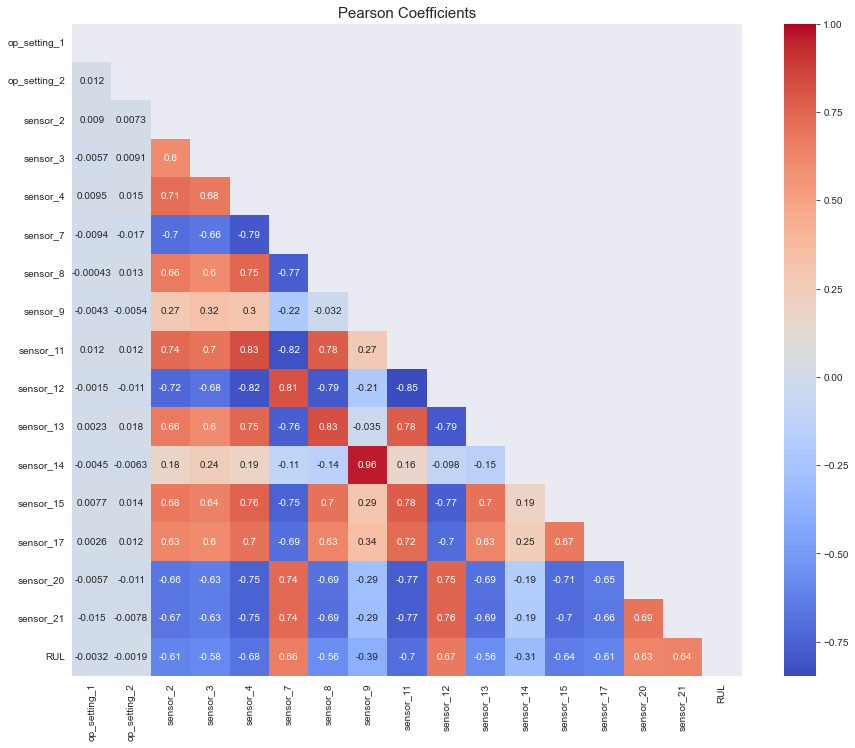

In [29]:
# Subset dataframe to drop unit and cycle_time (not required)
pearson_df = failure_df.drop(unit_details, axis=1)

# Show Pearson correlation matrix
plt.figure(figsize=(15,12))
matrix = np.triu(pearson_df.corr())  
sns.heatmap(pearson_df.corr(), vmax = 1, mask=matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Coefficients', size = 15)
plt.show() 

The heatmap is consistent with the previous plots:

  - High correlation between 9 and 14 as expected.
  - Lots of strong correlations between sensors and the RUL values. 
       - Similar strong positive correlations with the "rising teardrop" Group 1: e.g. 2,3,4,7,11,13,15,17 
       - Similar strong negative correlations with the "falling teardrop" Group 2: e.g. 7&12, 20&21
       - Less strong negative correlation with "shark tooth" Group 3: 9&14
       - The strength of the correlation with RUL is the order:  11 > 4 > 12 > 7 > 15 > 20
       - No correlation with op_settings as expected

Each modeling exercise in the next sections will need to treat these relationships in the appropriate manner.  For example, for linear regression modelling, further processing may be required to eliminate mulit-collinearity while in the planned ML modelling, PCA may be useful in automatically removing paired sensors and grouping sensors with similar patterns through dimension reduction.

To complete the EDA process, the op_settings and sensors 9 and 14 columns will be dropped to generate the cleaned dataset for analysis and modeling in Parts 2 and 3.  


In [30]:
# Drop columns, confirm final dataframe characteristics
failure_df_final = failure_df.drop(['sensor_9', 'sensor_14','op_setting_1' ,'op_setting_2'], axis = 1)
failure_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  20631 non-null  int64  
 1   cycle_time   20631 non-null  int64  
 2   sensor_2     20631 non-null  float64
 3   sensor_3     20631 non-null  float64
 4   sensor_4     20631 non-null  float64
 5   sensor_7     20631 non-null  float64
 6   sensor_8     20631 non-null  float64
 7   sensor_11    20631 non-null  float64
 8   sensor_12    20631 non-null  float64
 9   sensor_13    20631 non-null  float64
 10  sensor_15    20631 non-null  float64
 11  sensor_17    20631 non-null  int64  
 12  sensor_20    20631 non-null  float64
 13  sensor_21    20631 non-null  float64
 14  RUL          20631 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 2.4 MB


In [31]:
# Save cleaned dataset to /data directory
save_file = './data/failure_cleaned.csv'
failure_df_final.to_csv(save_file, index=False)

### Summary

[go to top](#Table-of-Contents) <br>

The NASA train_FD001 data set with the records of failed engines has been loaded, inspected and cleaned for the analyses required in this study.  Out of the 21 sensors and 3 operating settings, only 12 sensors appear to be useful for the upcoming modeling.  Further, there are clearly two groups of sensors remaining in terms of shape and relationship to the RUL metric and some pairings of sensors within them, with the broadness of the overall distributions originating from the noise in the sensors and the differences in time series traces between engines.  The visible correlations and pairings between sensors will need to be managed appropriately in the modeling ahead. 

The cleaned data set is avaiable in the /data subfolder for the project, ready for Parts 2 and 3.
